In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
cola = pd.read_csv('../Resources/COLA_CESM1_FULL_LDC.csv')
cola['MON'] = pd.to_datetime(cola['MON'], format = '%H%M %d %b %Y')
cola['START'] = cola['MON'].dt.month
cola['TARGET'] = ((cola['START'] + cola['L']).astype(int))%12
cola['TARGET'] = cola['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START' - Nino3.4
cola_mean = cola.groupby(['L', 'START'])['LDC_SST_COLA_CESM1'].mean().reset_index()
cola_mean.rename(columns={'LDC_SST_COLA_CESM1': 'MEAN_SST_COLA_CESM1'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3.4
cola_var = cola.groupby(['L', 'START'])['LDC_SST_COLA_CESM1'].var().reset_index()
cola_var.rename(columns={'LDC_SST_COLA_CESM1': 'VAR_SST_COLA_CESM1'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino1+2
cola_mean_onetwo = cola.groupby(['L', 'START'])['LDC_SST_COLA_CESM1_ONETWO'].mean().reset_index()
cola_mean_onetwo.rename(columns={'LDC_SST_COLA_CESM1_ONETWO': 'MEAN_SST_COLA_CESM1_ONETWO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino1+2
cola_var_onetwo = cola.groupby(['L', 'START'])['LDC_SST_COLA_CESM1_ONETWO'].var().reset_index()
cola_var_onetwo.rename(columns={'LDC_SST_COLA_CESM1_ONETWO': 'VAR_SST_COLA_CESM1_ONETWO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino3
cola_mean_three = cola.groupby(['L', 'START'])['LDC_SST_COLA_CESM1_THREE'].mean().reset_index()
cola_mean_three.rename(columns={'LDC_SST_COLA_CESM1_THREE': 'MEAN_SST_COLA_CESM1_THREE'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3
cola_var_three = cola.groupby(['L', 'START'])['LDC_SST_COLA_CESM1_THREE'].var().reset_index()
cola_var_three.rename(columns={'LDC_SST_COLA_CESM1_THREE': 'VAR_SST_COLA_CESM1_THREE'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino4
cola_mean_four = cola.groupby(['L', 'START'])['LDC_SST_COLA_CESM1_FOUR'].mean().reset_index()
cola_mean_four.rename(columns={'LDC_SST_COLA_CESM1_FOUR': 'MEAN_SST_COLA_CESM1_FOUR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino4
cola_var_four = cola.groupby(['L', 'START'])['LDC_SST_COLA_CESM1_FOUR'].var().reset_index()
cola_var_four.rename(columns={'LDC_SST_COLA_CESM1_FOUR': 'VAR_SST_COLA_CESM1_FOUR'}, inplace=True)

# Merge the mean and variance DataFrames
dfs = [cola_mean, cola_var,cola_mean_onetwo, cola_var_onetwo, cola_mean_three, cola_var_three, cola_mean_four, cola_var_four]
cola_stat = reduce(lambda left, right: pd.merge(left, right, on=['L', 'START']), dfs)
cola_stat

L  START  MEAN_SST_COLA_CESM1  VAR_SST_COLA_CESM1  \
0     1.5      1            26.716516            0.968884   
1     1.5      2            27.143832            0.656953   
2     1.5      3            27.680017            0.470398   
3     1.5      4            27.869485            0.276028   
4     1.5      5            27.326014            0.493559   
..    ...    ...                  ...                 ...   
115  10.5      8            27.968482            0.775902   
116  10.5      9            27.762687            0.807948   
117  10.5     10            26.928002            1.105438   
118  10.5     11            26.115936            1.059228   
119  10.5     12            25.414888            1.184008   

     MEAN_SST_COLA_CESM1_ONETWO  VAR_SST_COLA_CESM1_ONETWO  \
0                     23.795889                   0.402321   
1                     24.444666                   0.321284   
2                     24.364965                   0.496226   
3                     23.344466                   0.717739   
4                     21.945054                   0.933938   
..                          ...                        ...   
115                   23.714368                   0.711524   
116                   22.773825                   0.895394   
117                   21.614455                   1.129617   
118                   20.928485                   0.767826   
119                   20.647734                   0.435425   

     MEAN_SST_COLA_CESM1_THREE  VAR_SST_COLA_CESM1_THREE  \
0                    25.912148                  0.836250   
1                    26.578873                  0.606206   
2                    27.031897                  0.462719   
3                    26.845577                  0.370761   
4                    25.800083                  0.700835   
..                         ...                       ...   
115                  27.040492                  0.747153   
116                  26.473860                  0.950921   
117                  25.465826                  1.292681   
118                  24.638735                  1.123519   
119                  23.918052                  1.093075   

     MEAN_SST_COLA_CESM1_FOUR  VAR_SST_COLA_CESM1_FOUR  
0                   28.235130                 0.616628  
1                   28.353961                 0.416323  
2                   28.680026                 0.337920  
3                   28.910354                 0.206512  
4                   28.821855                 0.189200  
..                        ...                      ...  
115                 28.840817                 0.434509  
116                 28.933831                 0.318694  
117                 28.499873                 0.525801  
118                 27.985525                 0.661568  
119                 27.464330                 0.845963  

[120 rows x 10 columns]

In [2]:
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
cola_stat['TARGET'] = ((cola_stat['START'] + cola_stat['L']).astype(int))%12
cola_stat['TARGET'] = cola_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
cola_stat['SZN'] = cola_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_COLA_CESM1','VAR_SST_COLA_CESM1',
             'MEAN_SST_COLA_CESM1_ONETWO','VAR_SST_COLA_CESM1_ONETWO',
             'MEAN_SST_COLA_CESM1_THREE','VAR_SST_COLA_CESM1_THREE',
             'MEAN_SST_COLA_CESM1_FOUR','VAR_SST_COLA_CESM1_FOUR' ]
cola_stat = cola_stat[new_order]

cola_stat.to_csv('../Resources/cola_stat.csv', index=False)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
cola_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola
    
cola_stat_dfs['lead1']

L  START  TARGET  SZN  MEAN_SST_COLA_CESM1  VAR_SST_COLA_CESM1  \
0   1.5      1       2  JFM            26.716516            0.968884   
1   1.5      2       3  FMA            27.143832            0.656953   
2   1.5      3       4  MAM            27.680017            0.470398   
3   1.5      4       5  AMJ            27.869485            0.276028   
4   1.5      5       6  MJJ            27.326014            0.493559   
5   1.5      6       7  JJA            26.523578            0.859326   
6   1.5      7       8  JAS            26.148790            1.012374   
7   1.5      8       9  ASO            25.895536            1.124168   
8   1.5      9      10  SON            26.219413            1.189807   
9   1.5     10      11  OND            26.507774            1.235117   
10  1.5     11      12  NDJ            26.557379            1.345966   
11  1.5     12       1  DJF            26.524674            1.282759   

    MEAN_SST_COLA_CESM1_ONETWO  VAR_SST_COLA_CESM1_ONETWO  \
0                    23.795889                   0.402321   
1                    24.444666                   0.321284   
2                    24.364965                   0.496226   
3                    23.344466                   0.717739   
4                    21.945054                   0.933938   
5                    20.896921                   0.920676   
6                    20.336373                   0.908512   
7                    20.085883                   0.692843   
8                    20.372308                   0.649354   
9                    20.977760                   0.771179   
10                   21.797863                   0.839573   
11                   22.719232                   0.765617   

    MEAN_SST_COLA_CESM1_THREE  VAR_SST_COLA_CESM1_THREE  \
0                   25.912148                  0.836250   
1                   26.578873                  0.606206   
2                   27.031897                  0.462719   
3                   26.845577                  0.370761   
4                   25.800083                  0.700835   
5                   24.699513                  0.968048   
6                   24.303660                  1.031847   
7                   24.057964                  1.030702   
8                   24.430959                  1.138445   
9                   24.898244                  1.264890   
10                  25.195914                  1.373562   
11                  25.433323                  1.264712   

    MEAN_SST_COLA_CESM1_FOUR  VAR_SST_COLA_CESM1_FOUR  
0                  28.235130                 0.616628  
1                  28.353961                 0.416323  
2                  28.680026                 0.337920  
3                  28.910354                 0.206512  
4                  28.821855                 0.189200  
5                  28.582591                 0.319345  
6                  28.374068                 0.497087  
7                  28.246405                 0.613886  
8                  28.426643                 0.629674  
9                  28.551987                 0.624139  
10                 28.472411                 0.726486  
11                 28.296991                 0.666170

In [7]:
obs = pd.read_csv('../Resources/monthly_obs.csv')

#import gfdl data
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl

gfdl_stat_dfs['lead1']

L  START  TARGET  SZN  MEAN_SST_GFDL_SPEAR  VAR_SST_GFDL_SPEAR  \
0   1.5      1       2  JFM            26.730966            0.586198   
1   1.5      2       3  FMA            27.219343            0.350295   
2   1.5      3       4  MAM            27.700019            0.219369   
3   1.5      4       5  AMJ            27.778266            0.121108   
4   1.5      5       6  MJJ            27.458359            0.171726   
5   1.5      6       7  JJA            26.974693            0.323565   
6   1.5      7       8  JAS            26.671186            0.512346   
7   1.5      8       9  ASO            26.597937            0.654803   
8   1.5      9      10  SON            26.690056            0.811620   
9   1.5     10      11  OND            26.661196            0.978329   
10  1.5     11      12  NDJ            26.540862            0.964540   
11  1.5     12       1  DJF            26.476125            0.864874   

    MEAN_SST_GFDL_SPEAR_ONETWO  VAR_SST_GFDL_SPEAR_ONETWO  \
0                    25.979638                   0.357964   
1                    26.326895                   0.359253   
2                    25.643214                   0.473376   
3                    24.430450                   0.842295   
4                    23.237966                   1.147971   
5                    21.990734                   0.984383   
6                    21.213922                   0.905035   
7                    20.965738                   0.920961   
8                    21.323451                   0.729949   
9                    22.066752                   0.859135   
10                   23.299217                   0.821609   
11                   24.718734                   0.661348   

    MEAN_SST_GFDL_SPEAR_THREE  VAR_SST_GFDL_SPEAR_THREE  \
0                   26.370009                  0.625309   
1                   27.048718                  0.415907   
2                   27.380241                  0.258118   
3                   27.104430                  0.201826   
4                   26.420442                  0.322418   
5                   25.617086                  0.496223   
6                   25.161049                  0.629033   
7                   24.990717                  0.755537   
8                   25.092754                  0.842289   
9                   25.201379                  1.084657   
10                  25.363734                  1.038086   
11                  25.678048                  0.917243   

    MEAN_SST_GFDL_SPEAR_FOUR  VAR_SST_GFDL_SPEAR_FOUR  
0                  28.087537                 0.386829  
1                  28.269656                 0.241667  
2                  28.604104                 0.188554  
3                  28.747332                 0.133107  
4                  28.671299                 0.155934  
5                  28.476304                 0.200178  
6                  28.356804                 0.349455  
7                  28.425006                 0.492428  
8                  28.560566                 0.571811  
9                  28.526364                 0.642044  
10                 28.346189                 0.661746  
11                 28.150973                 0.538472

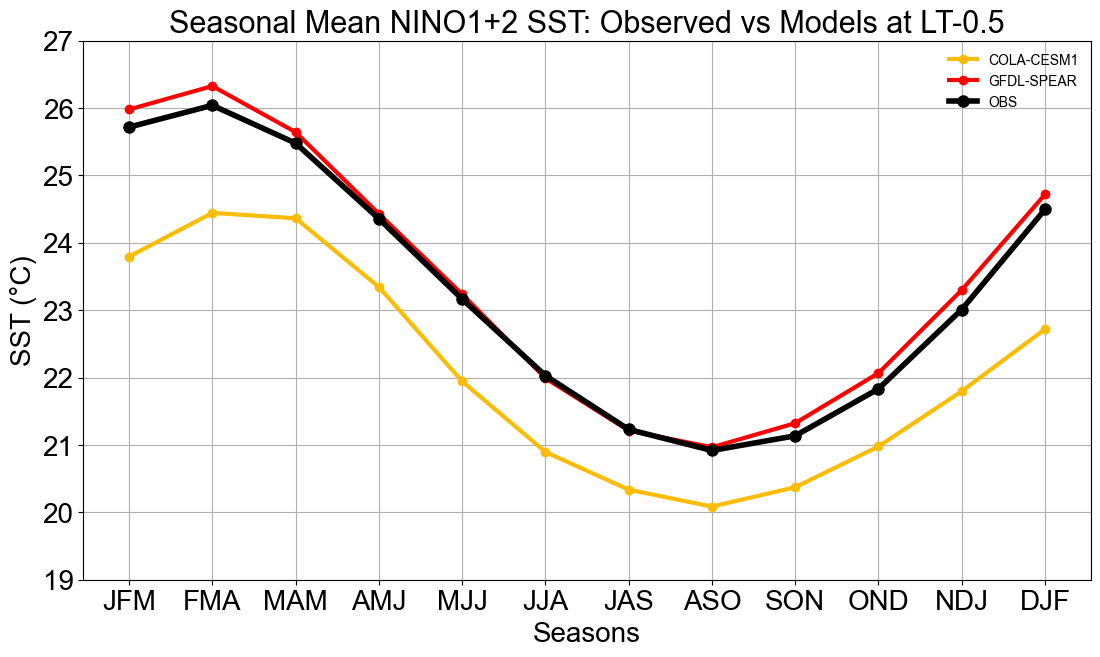

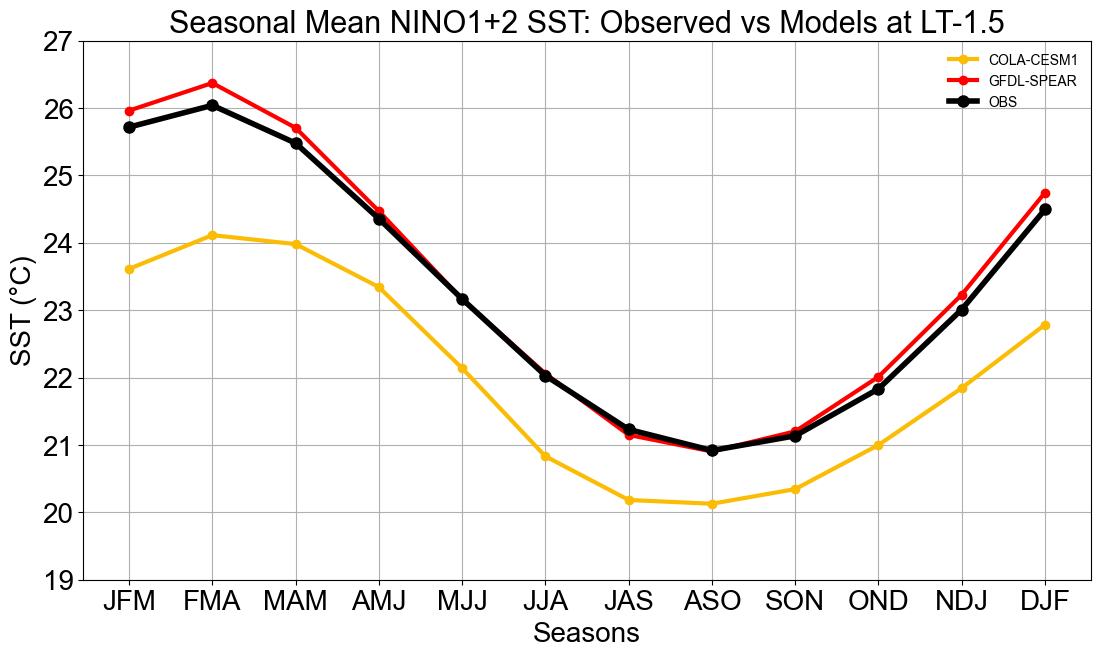

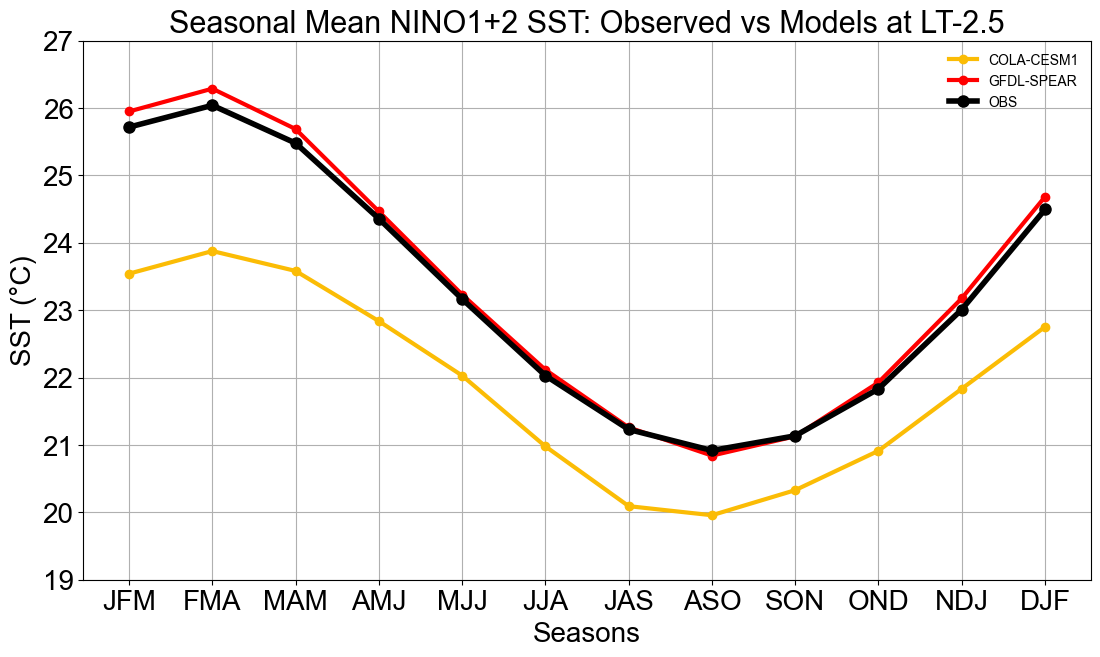

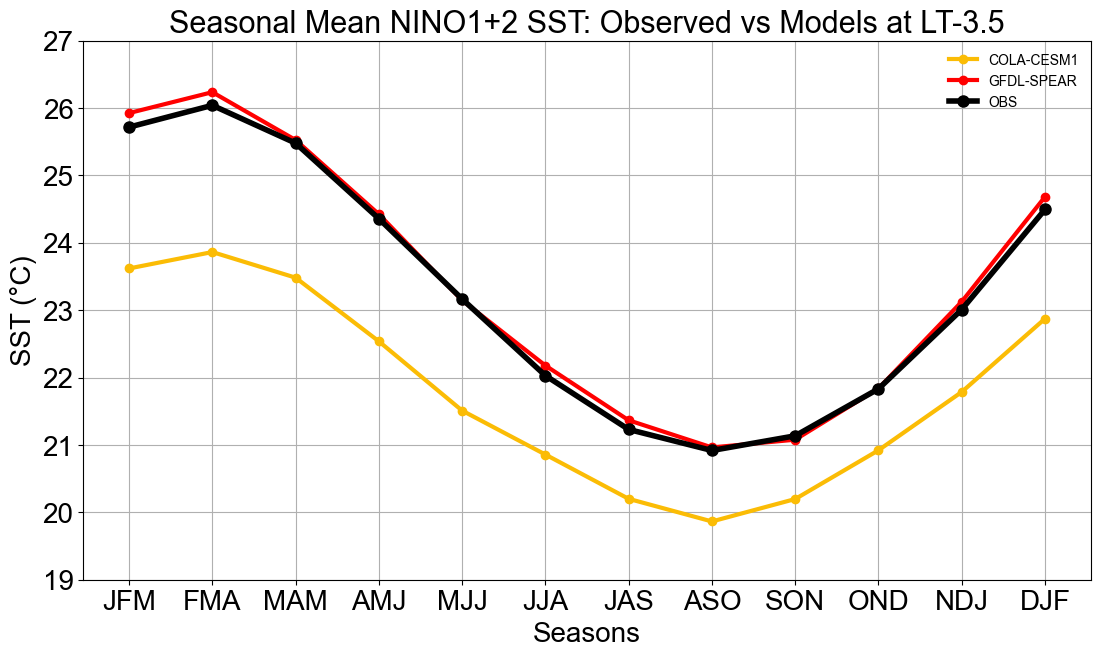

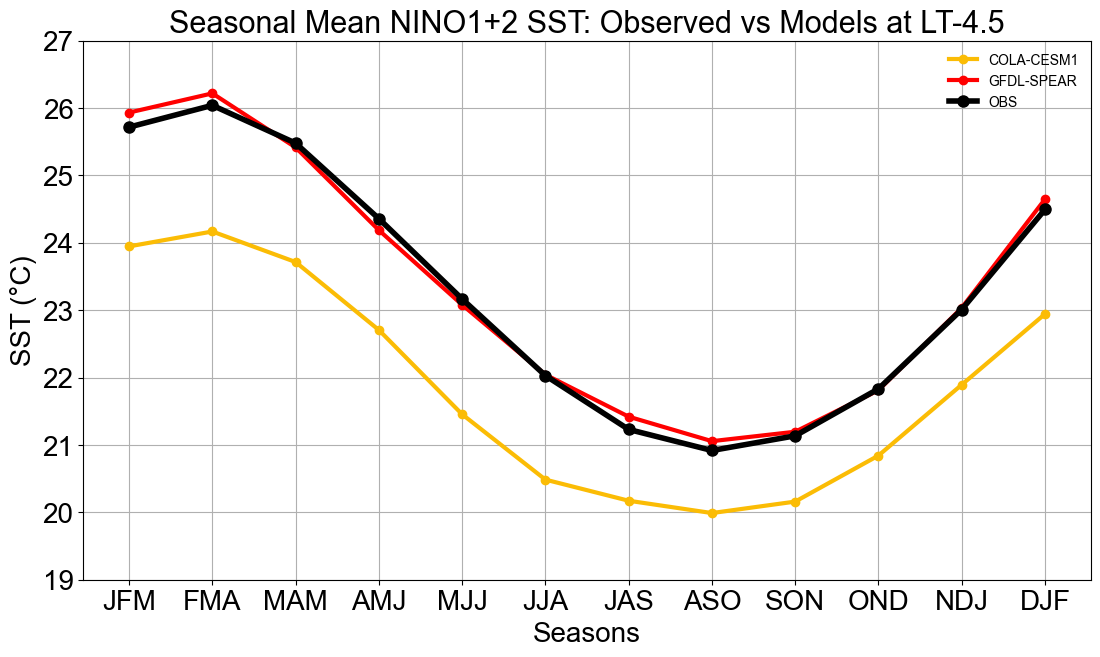

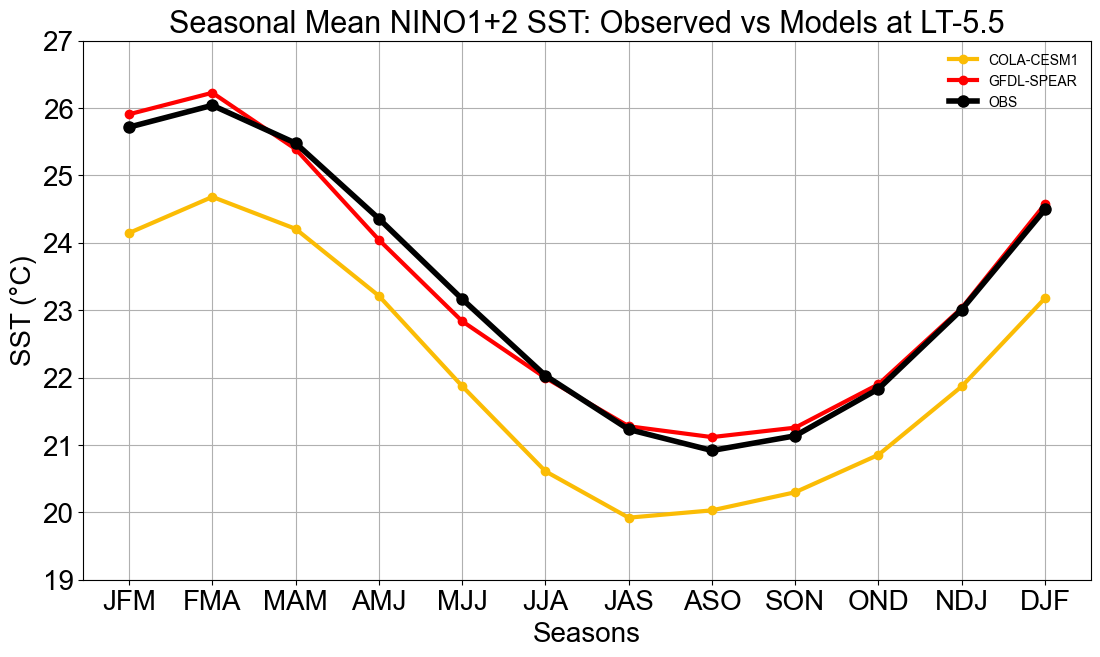

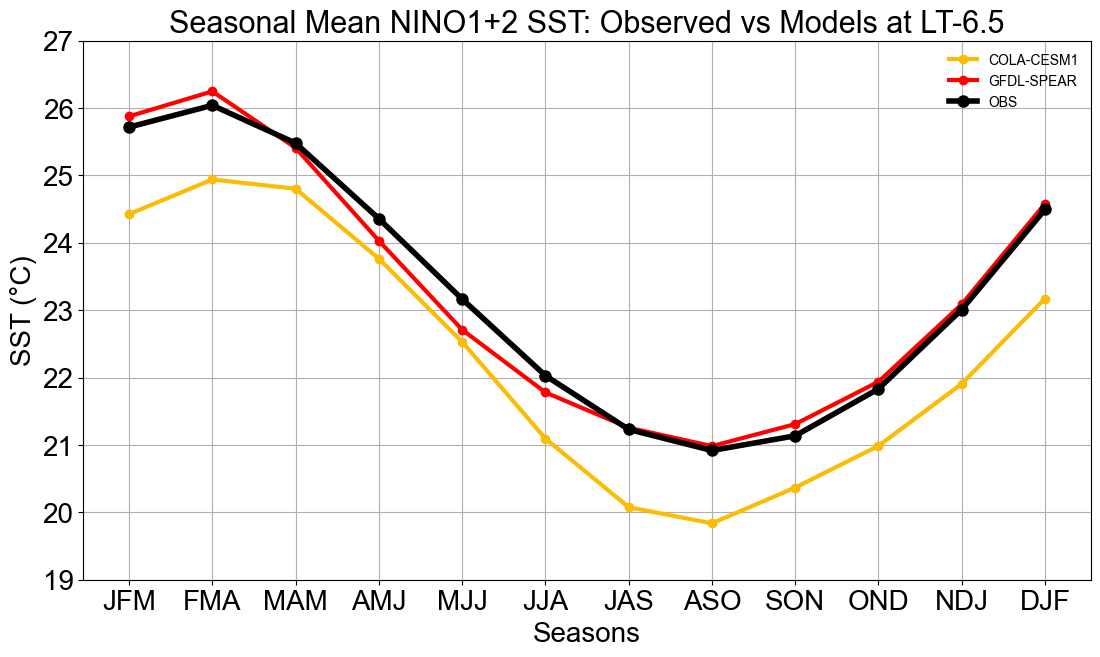

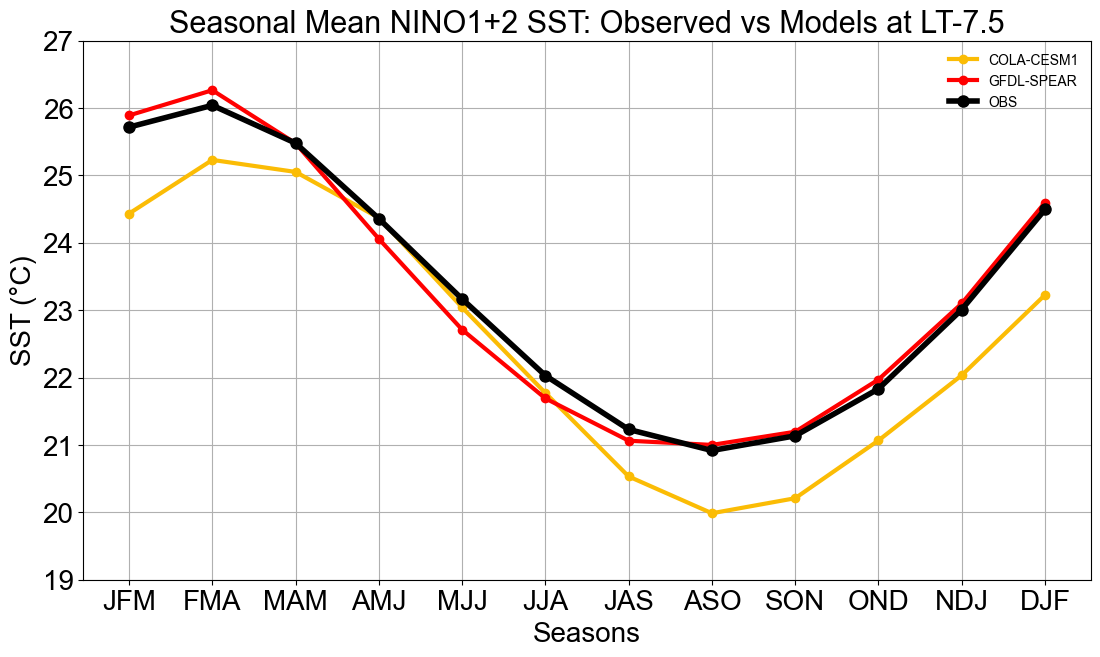

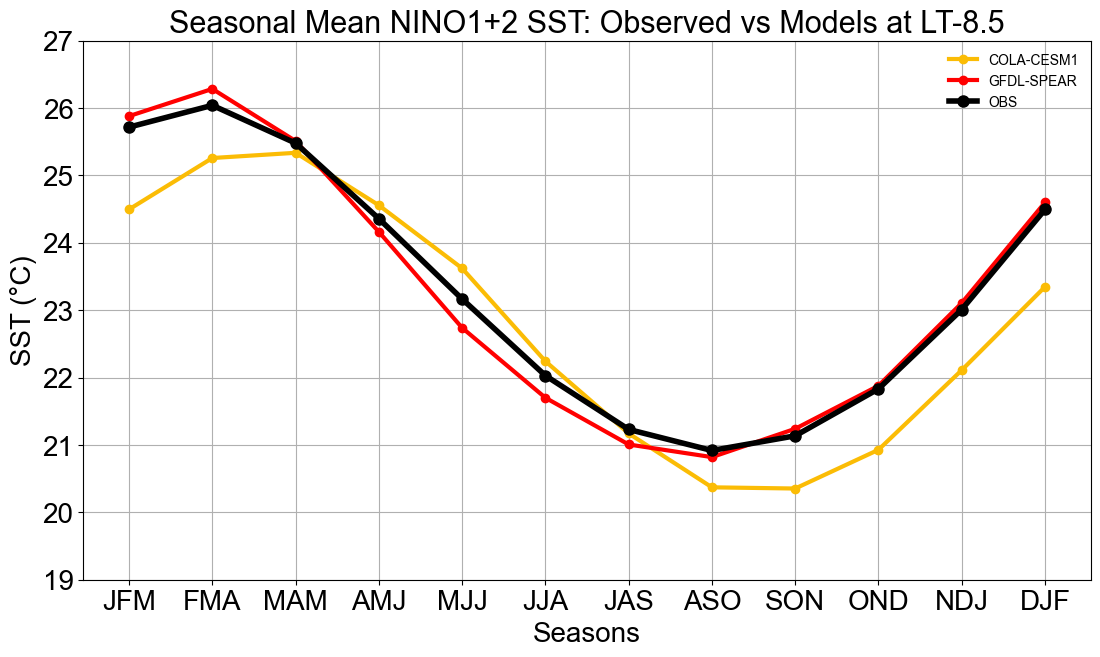

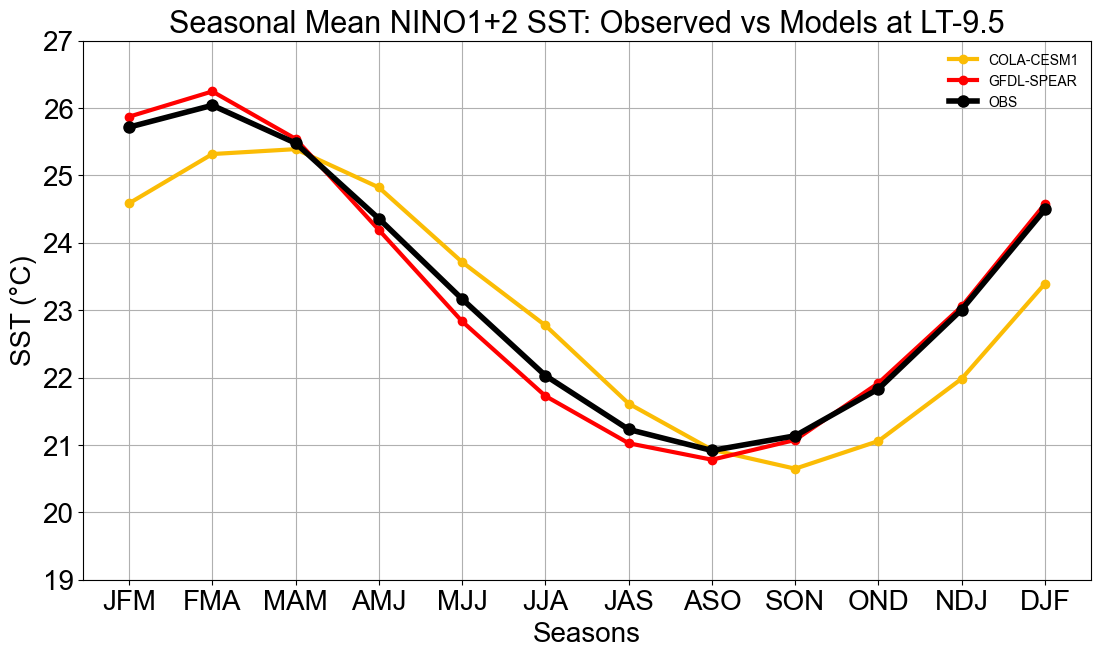

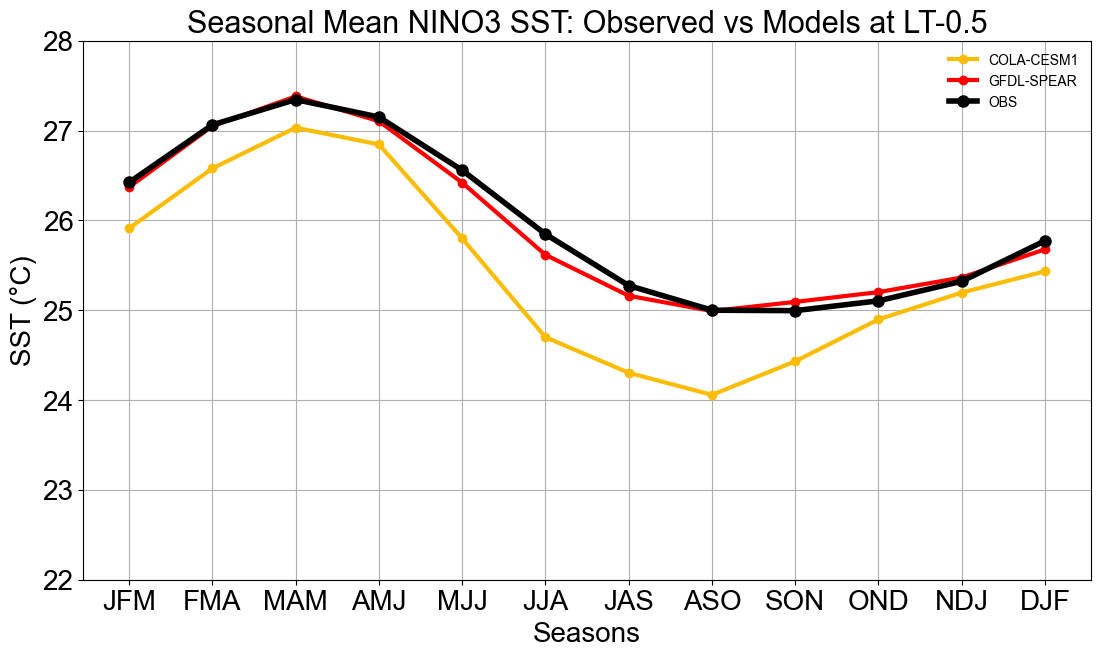

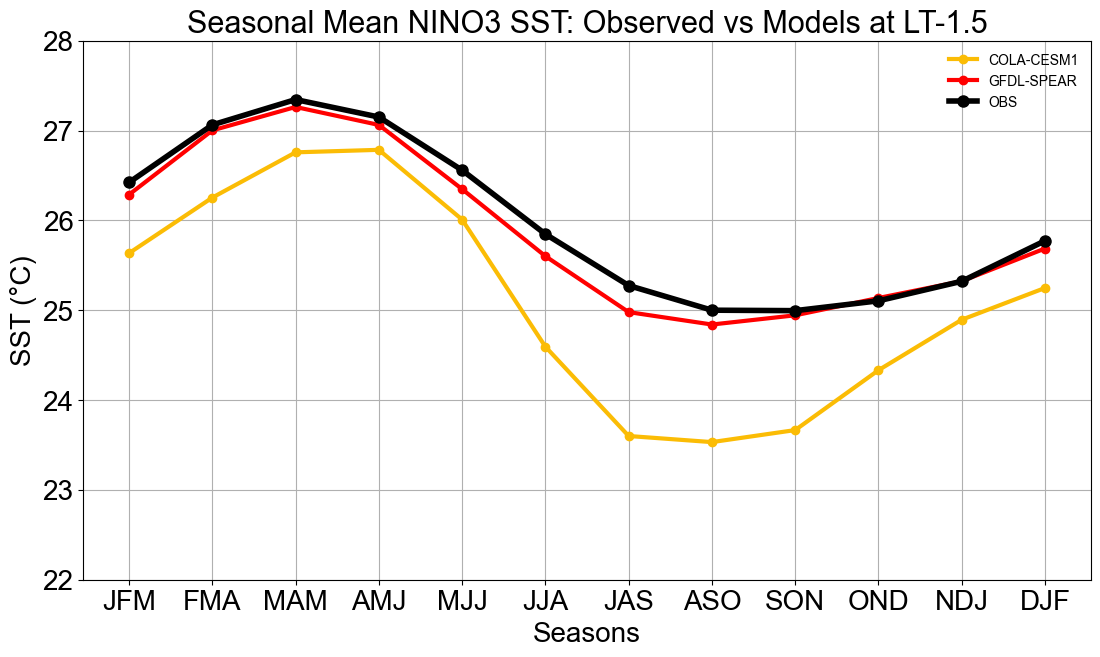

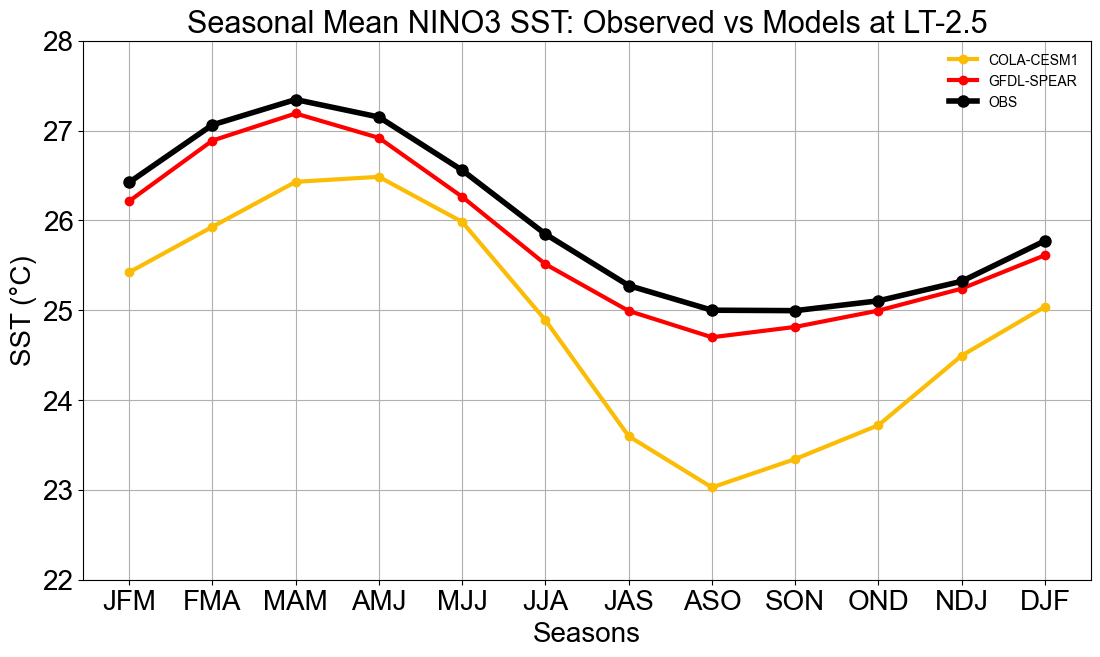

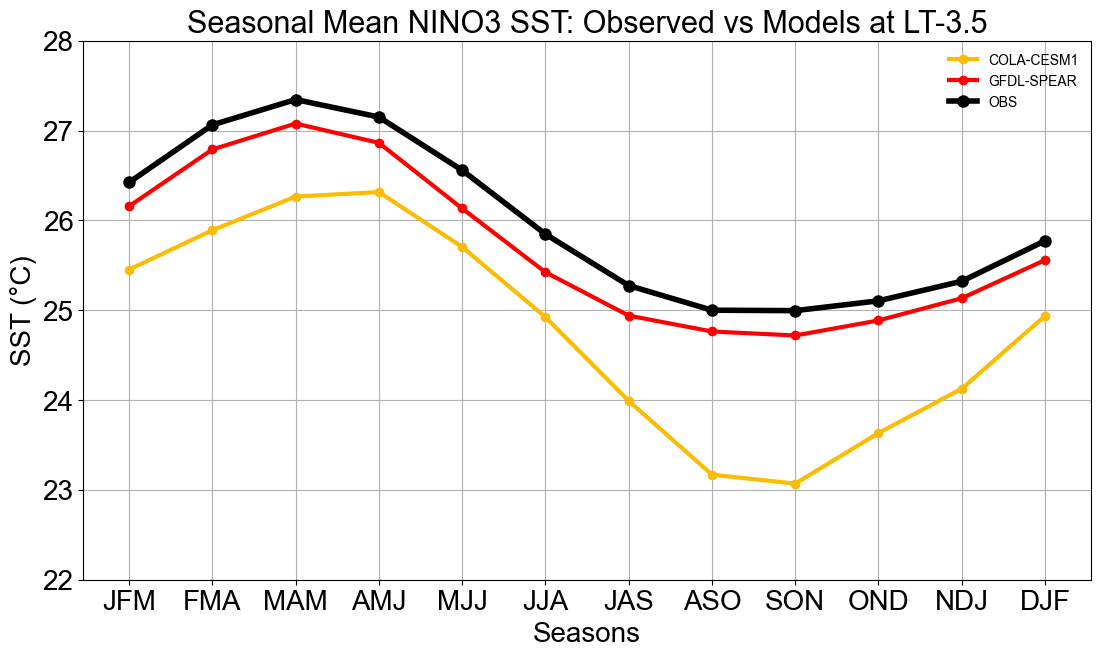

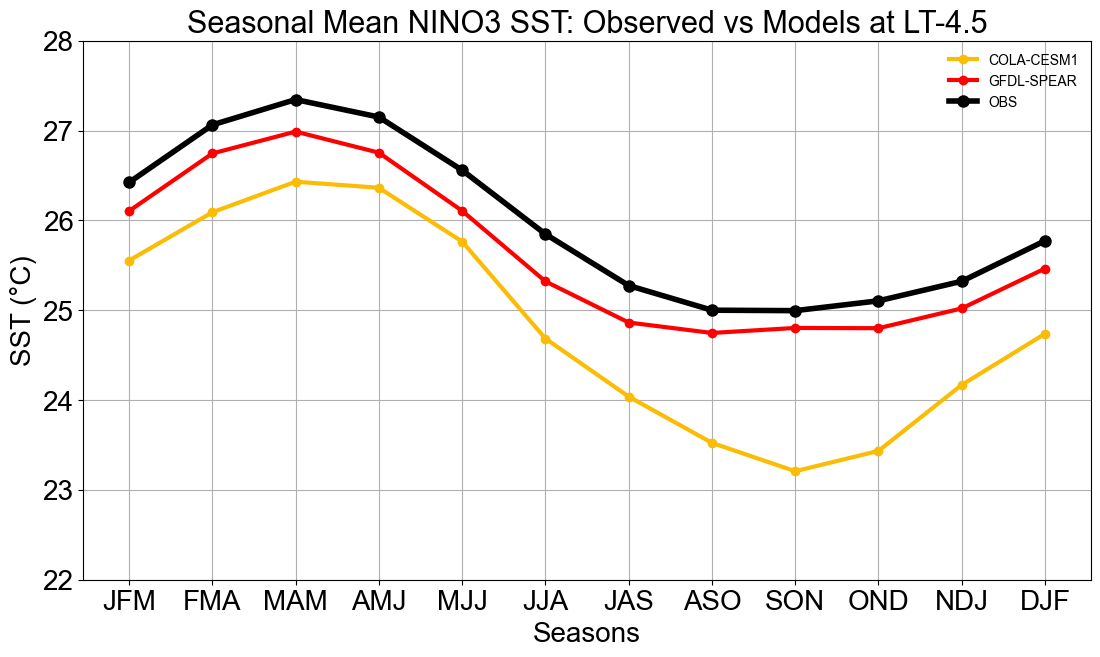

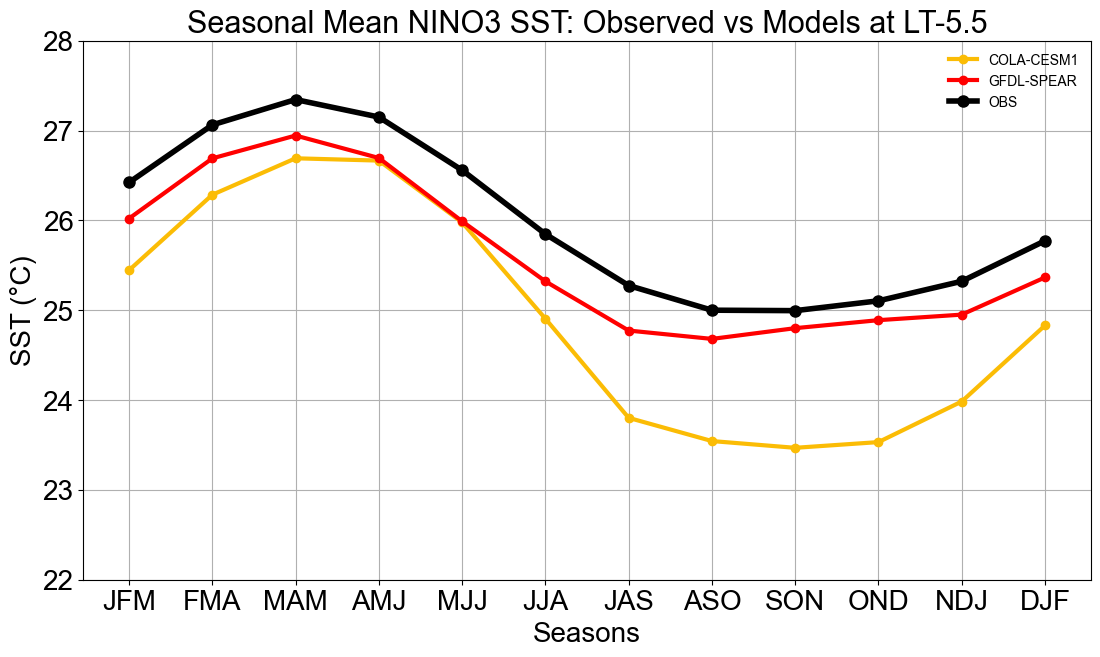

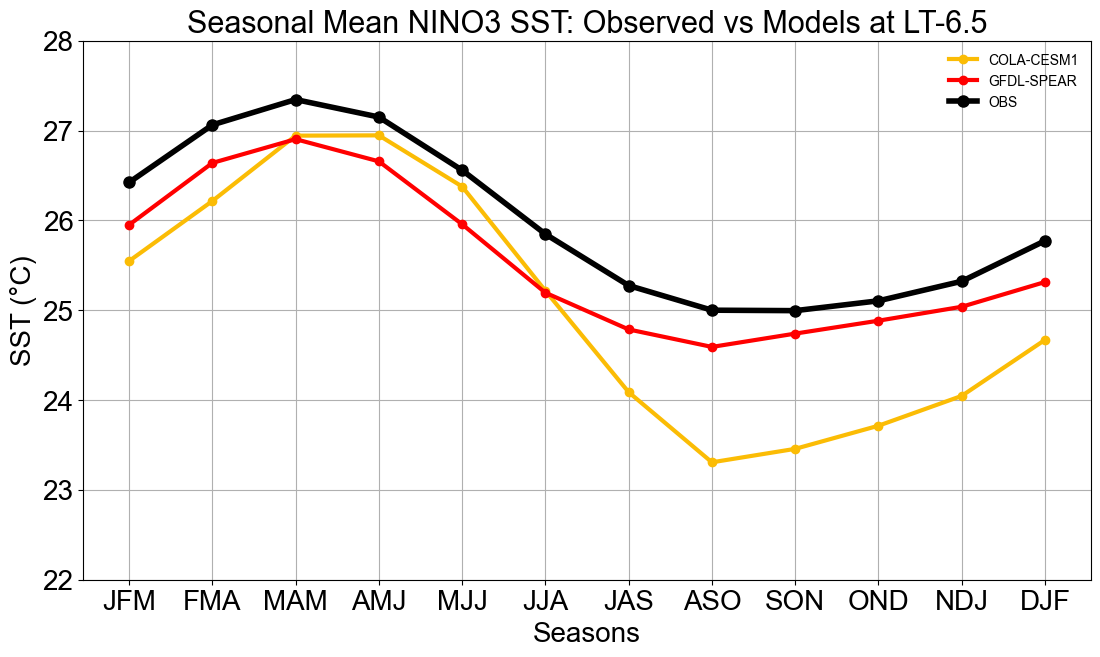

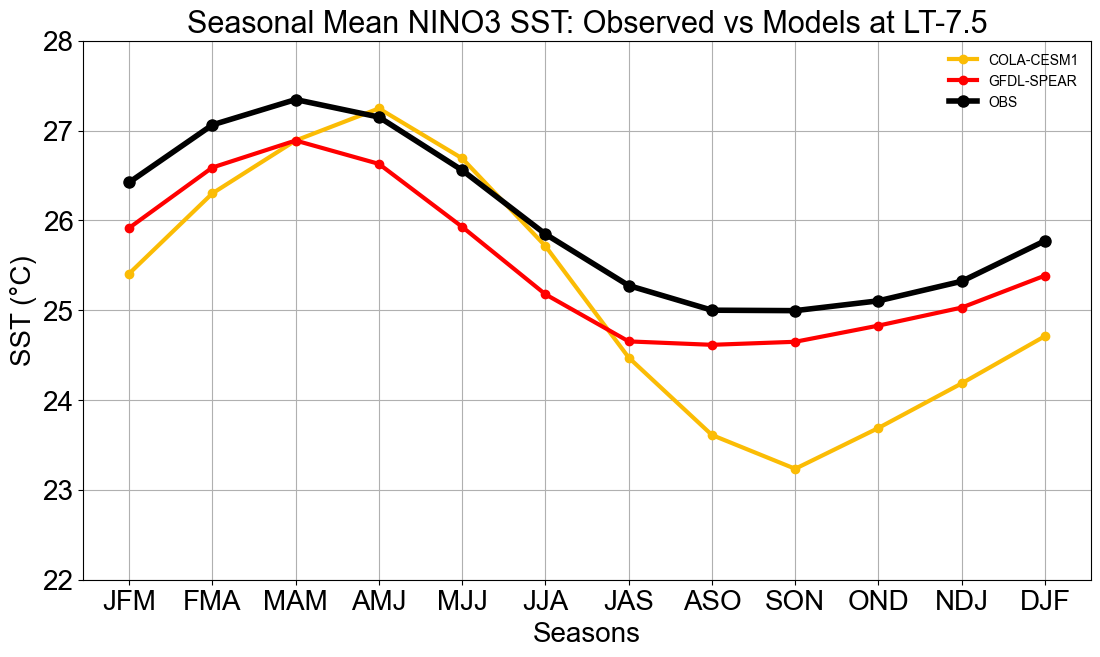

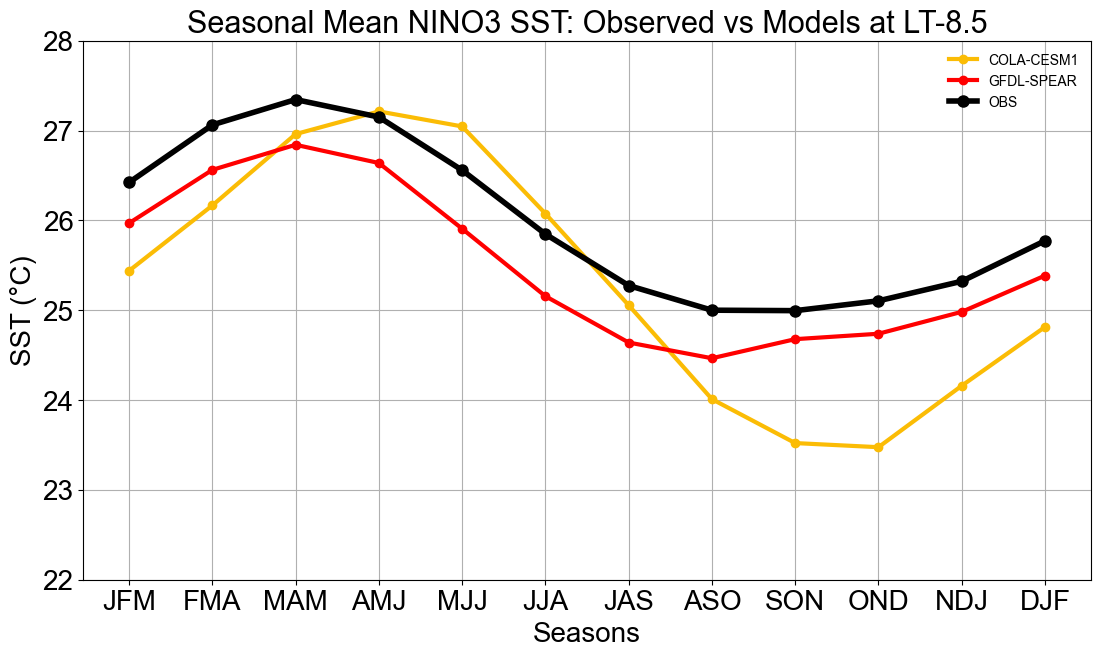

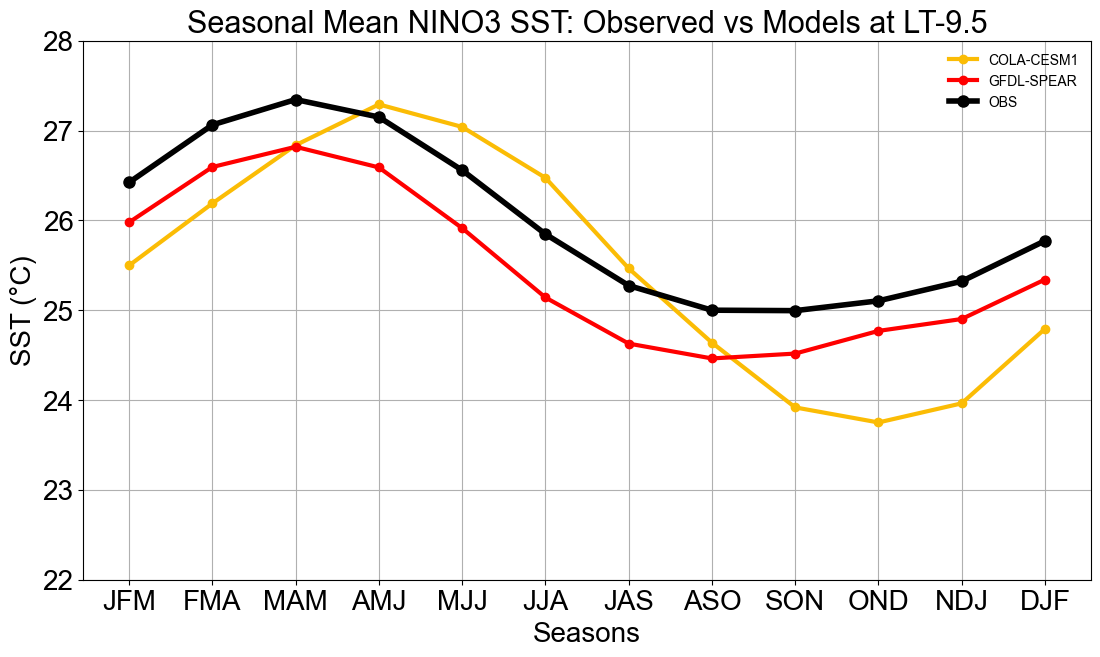

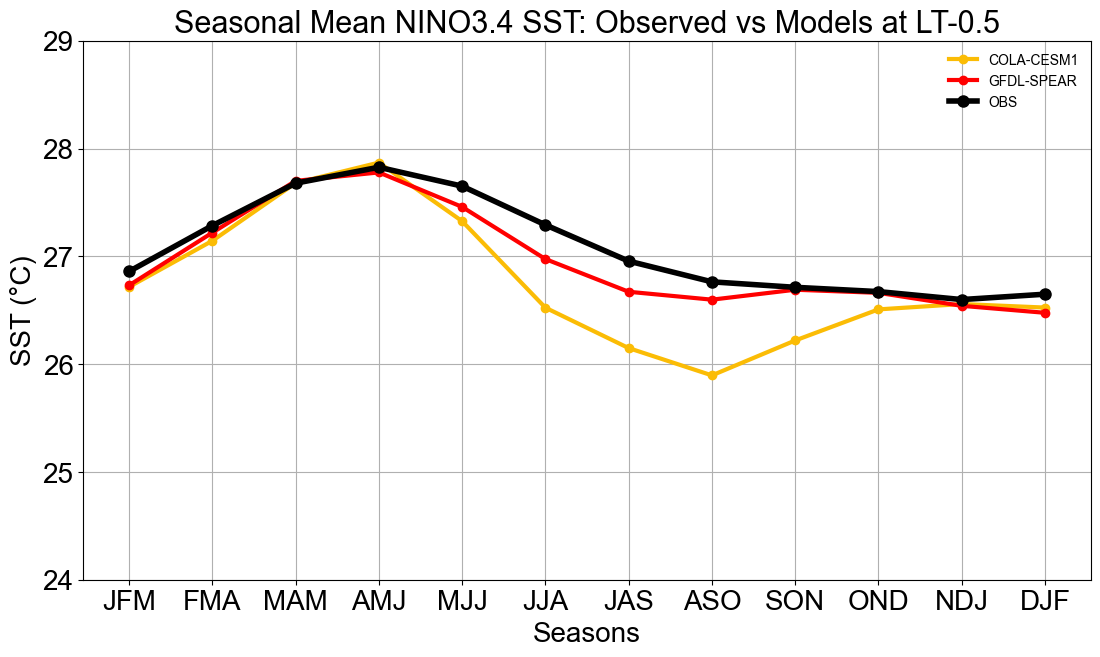

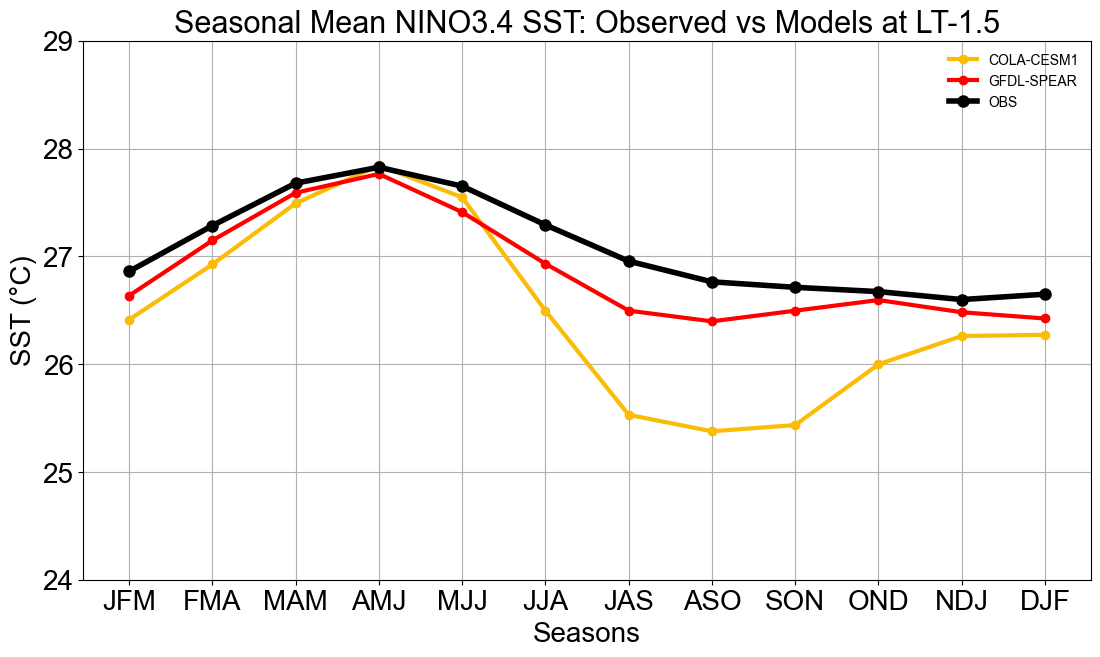

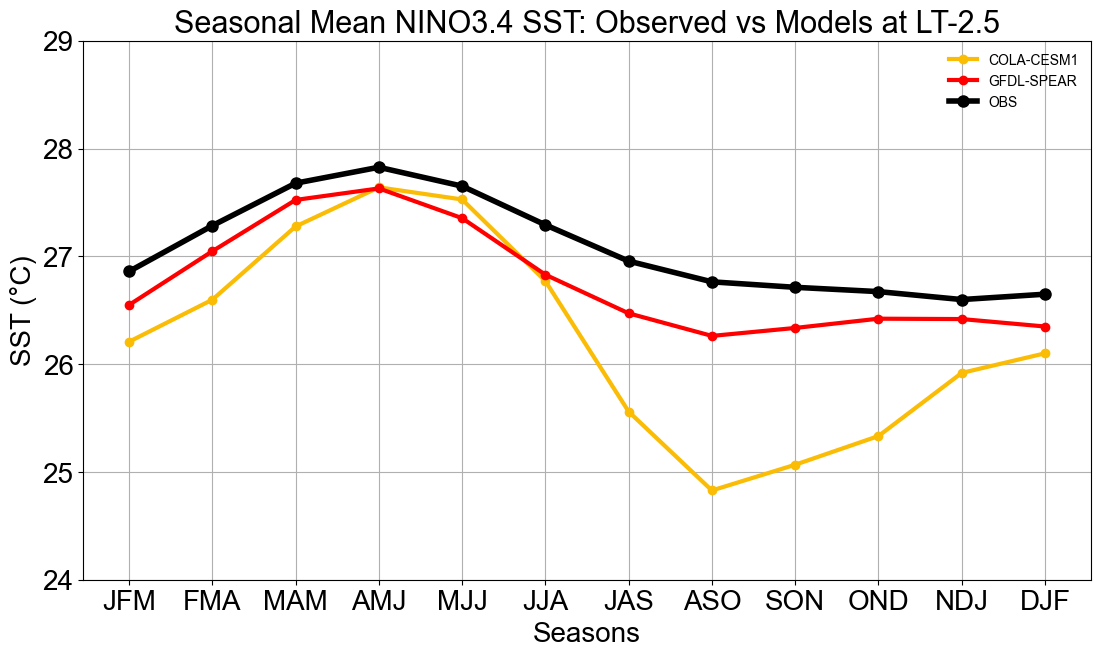

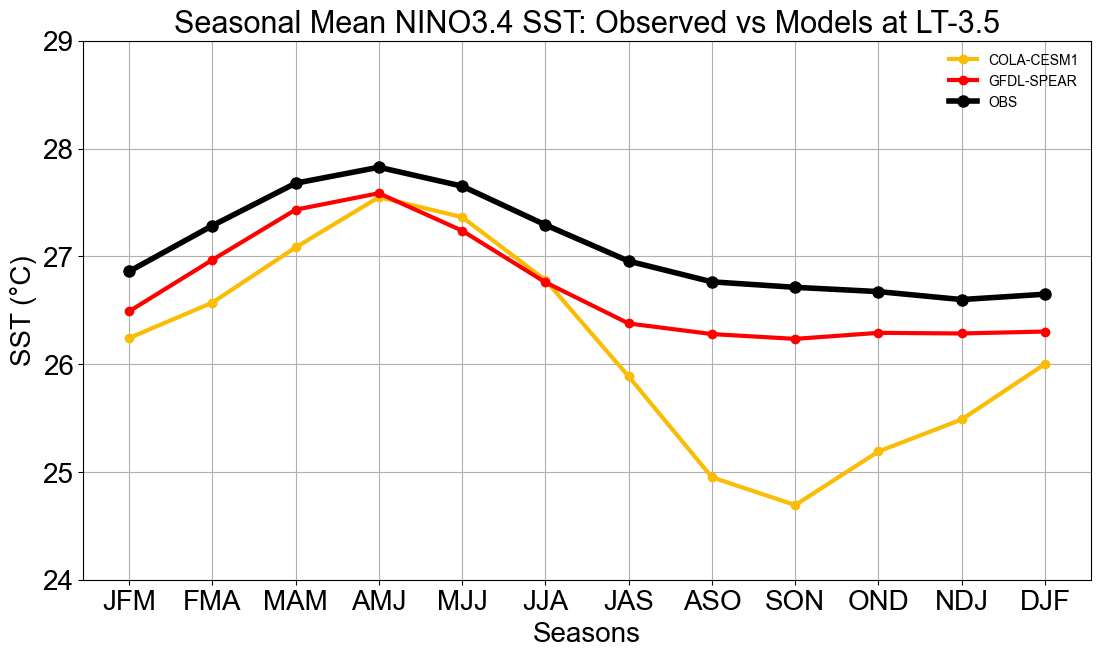

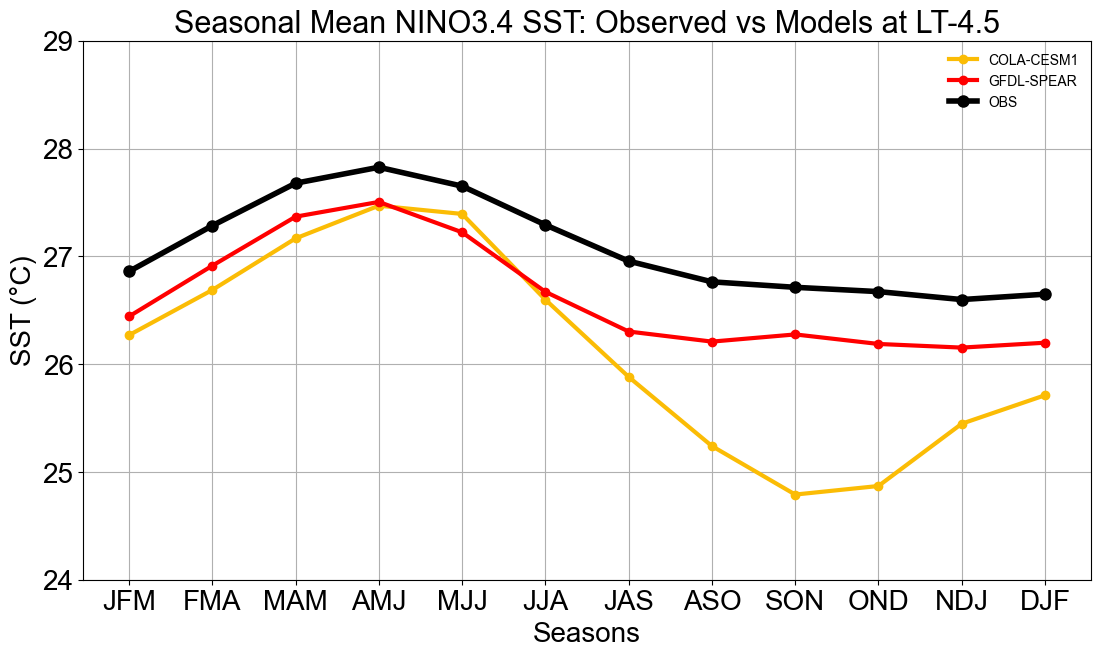

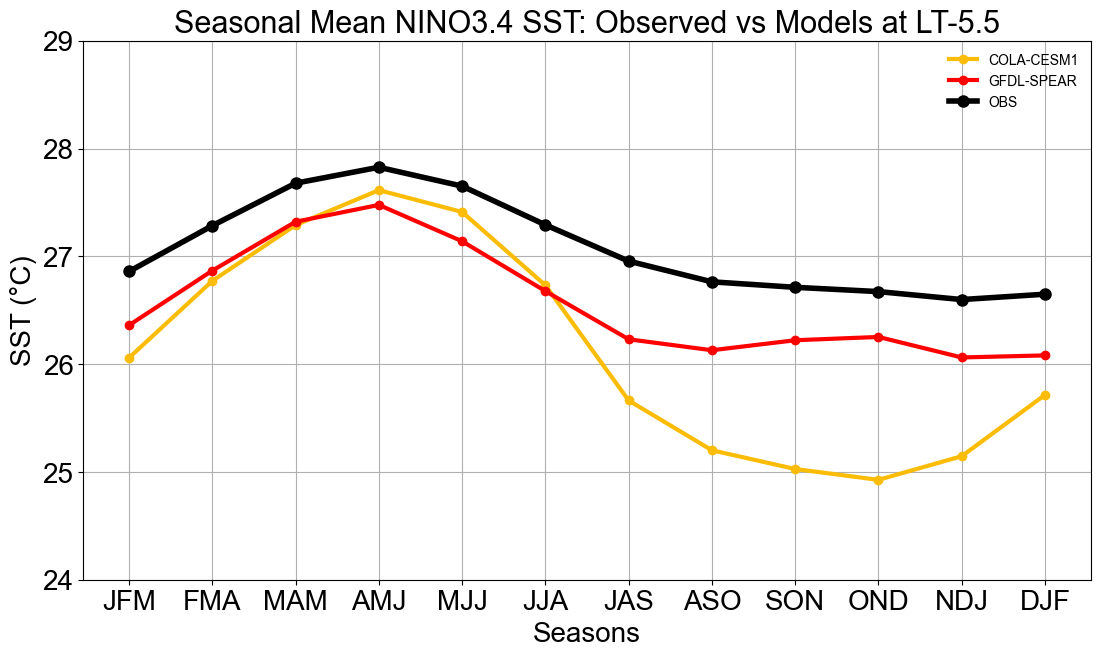

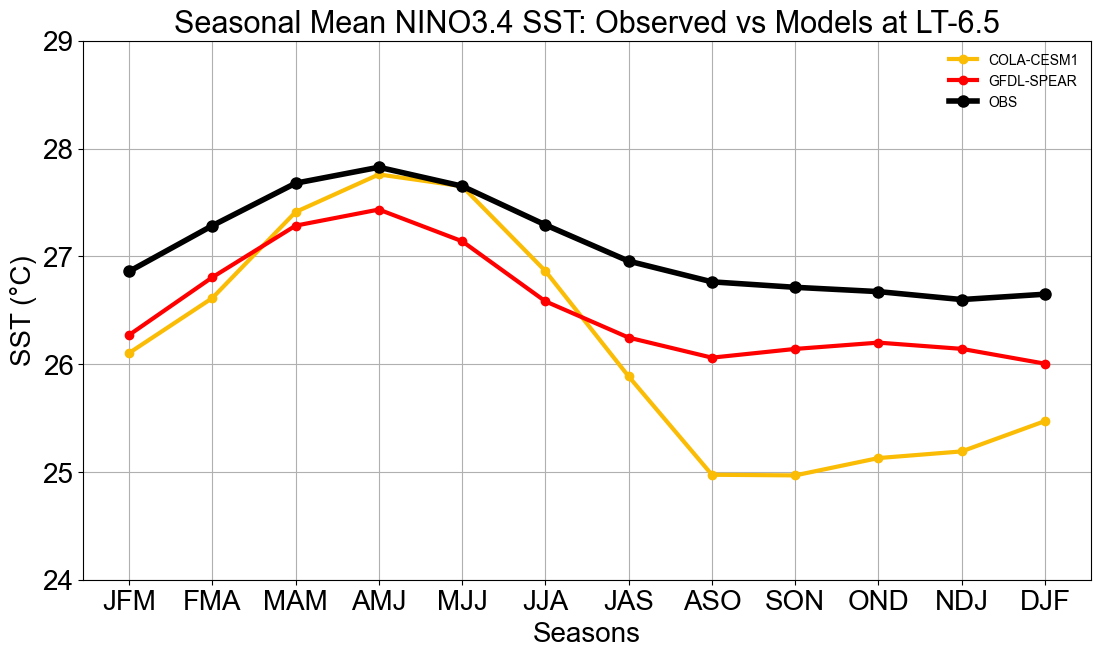

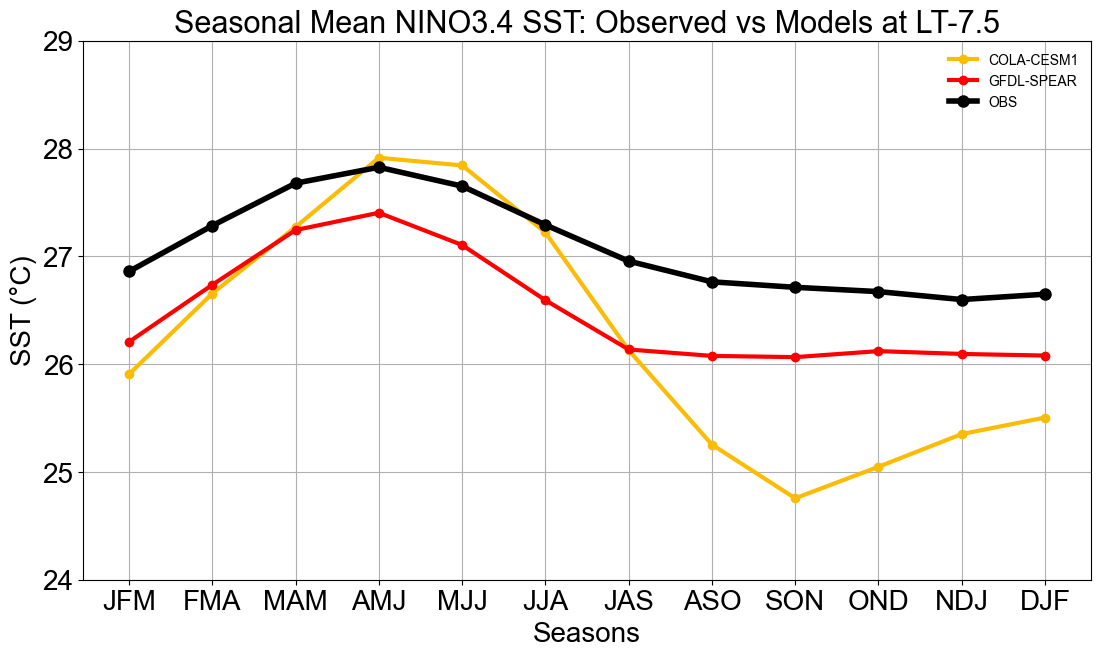

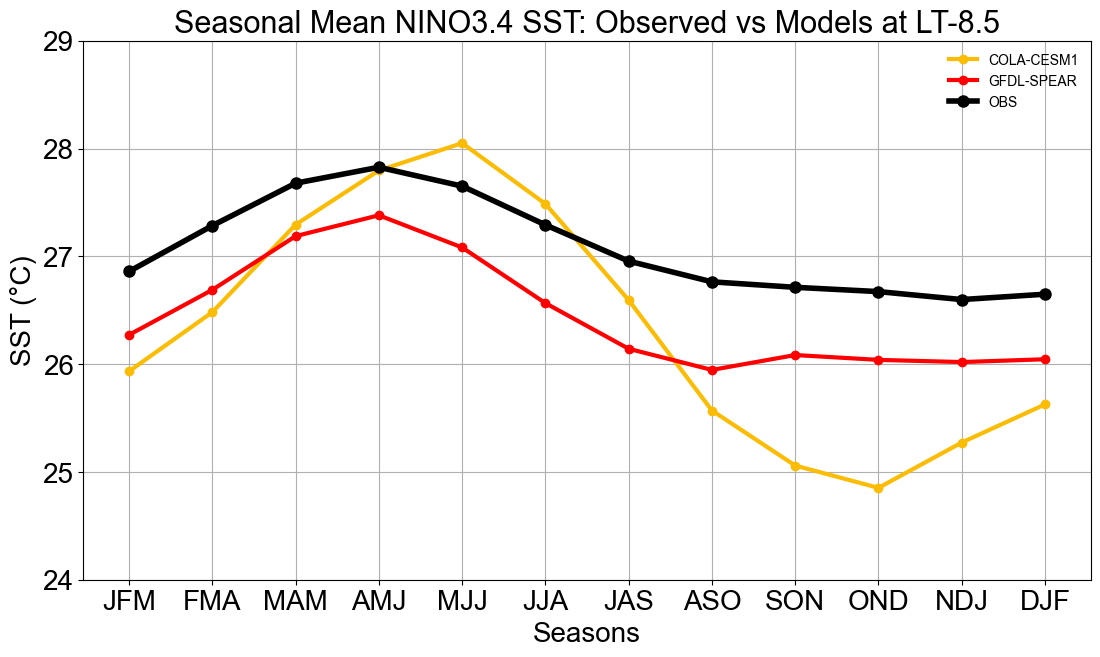

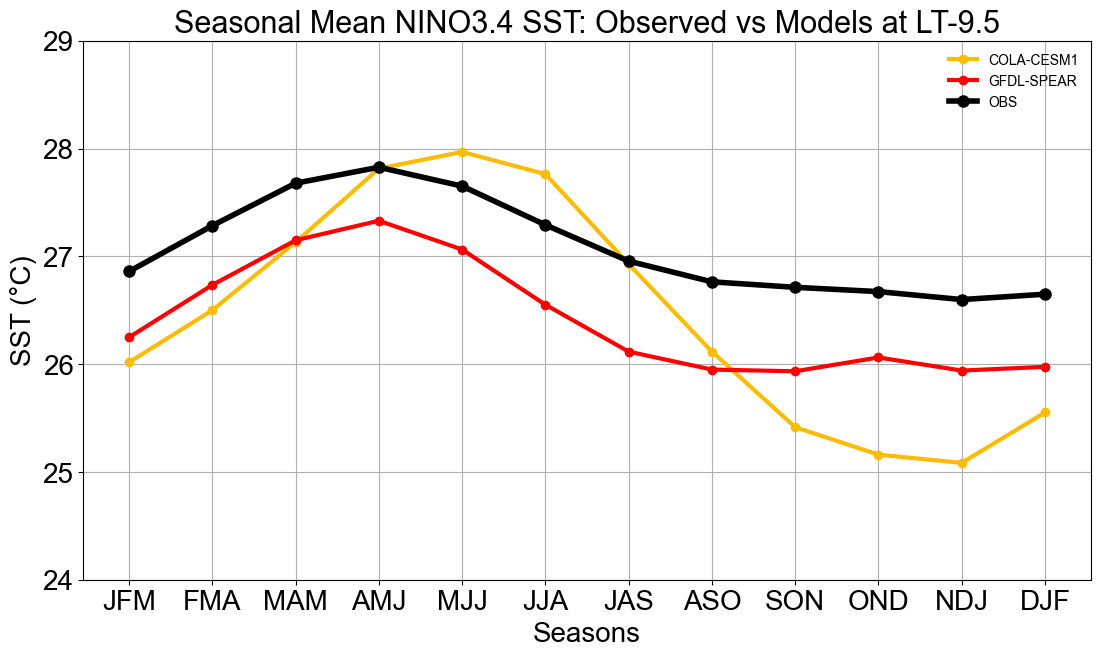

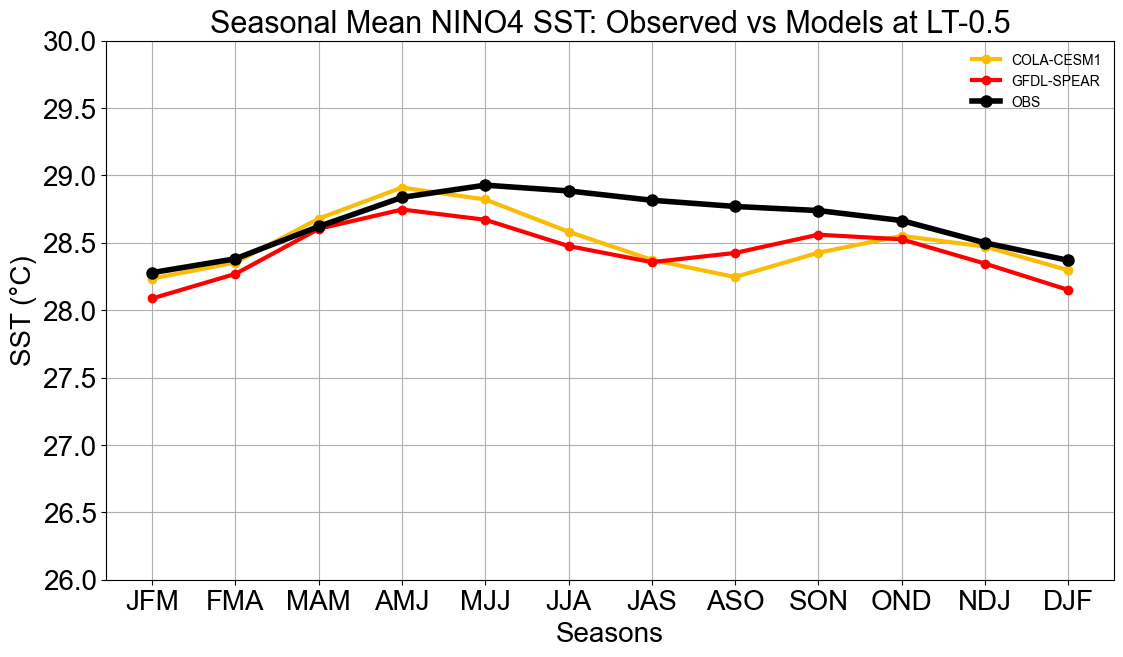

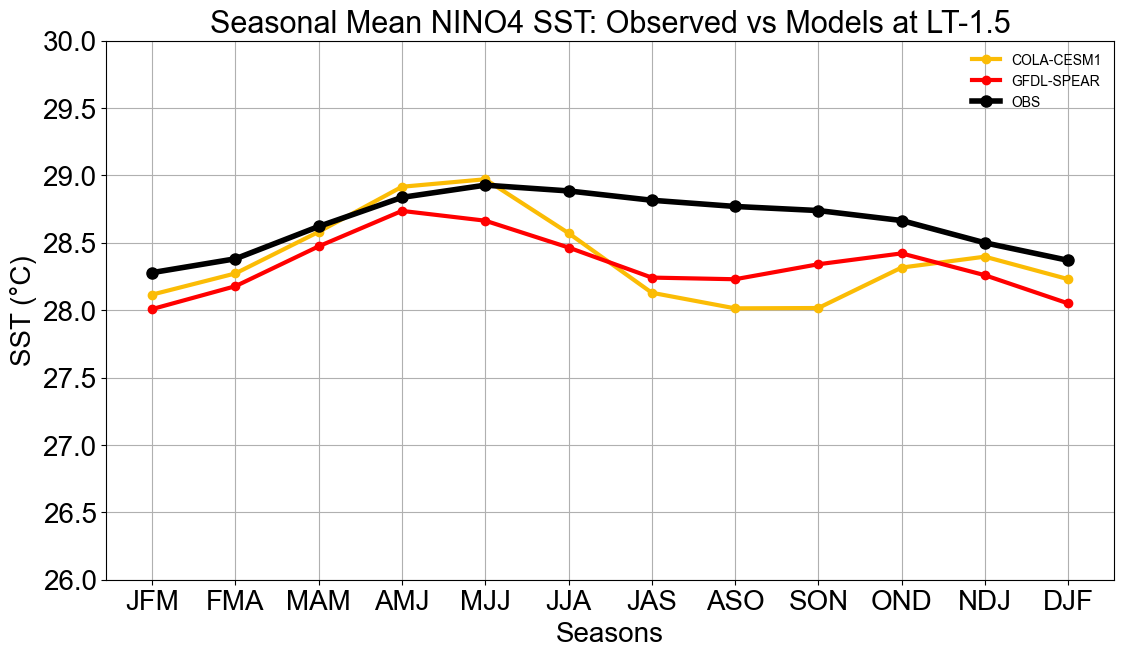

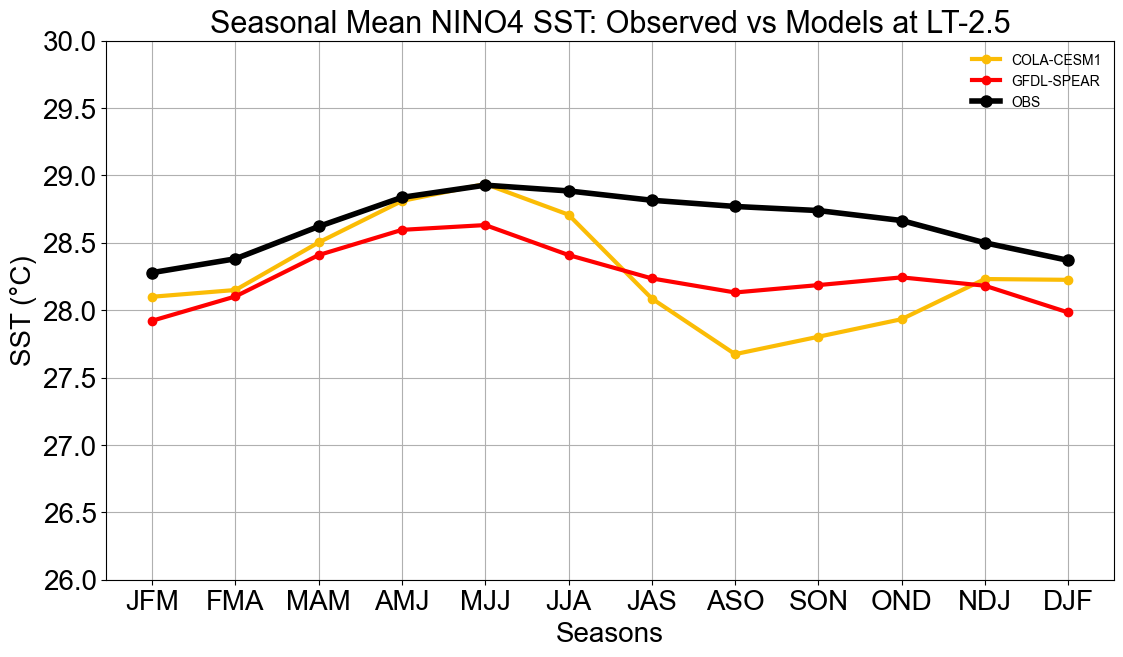

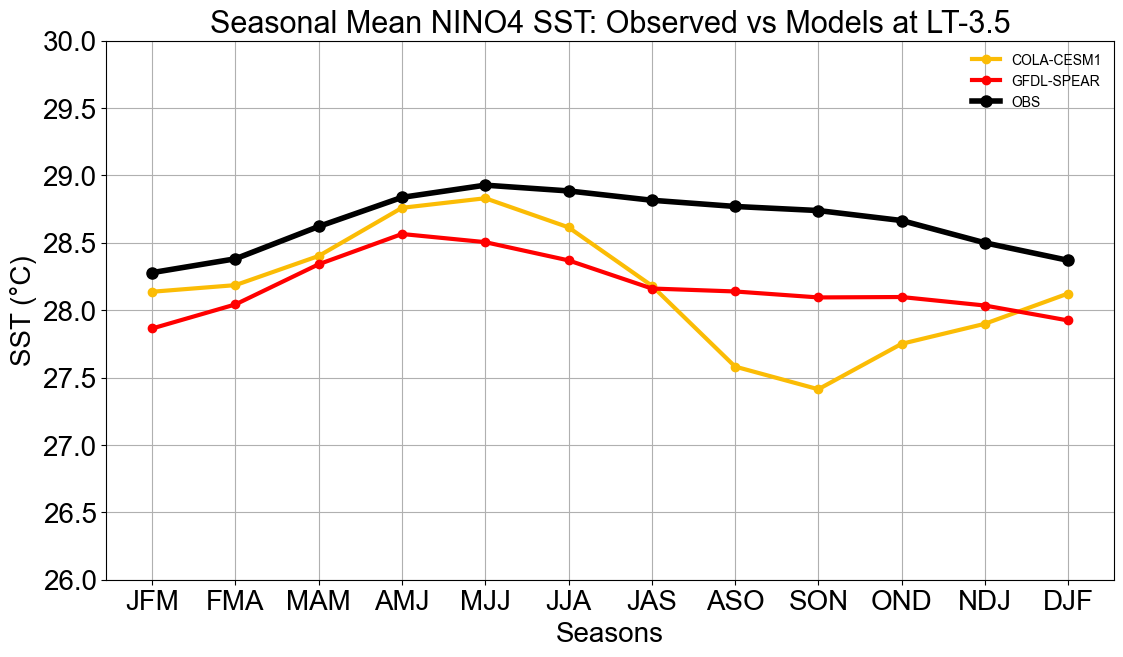

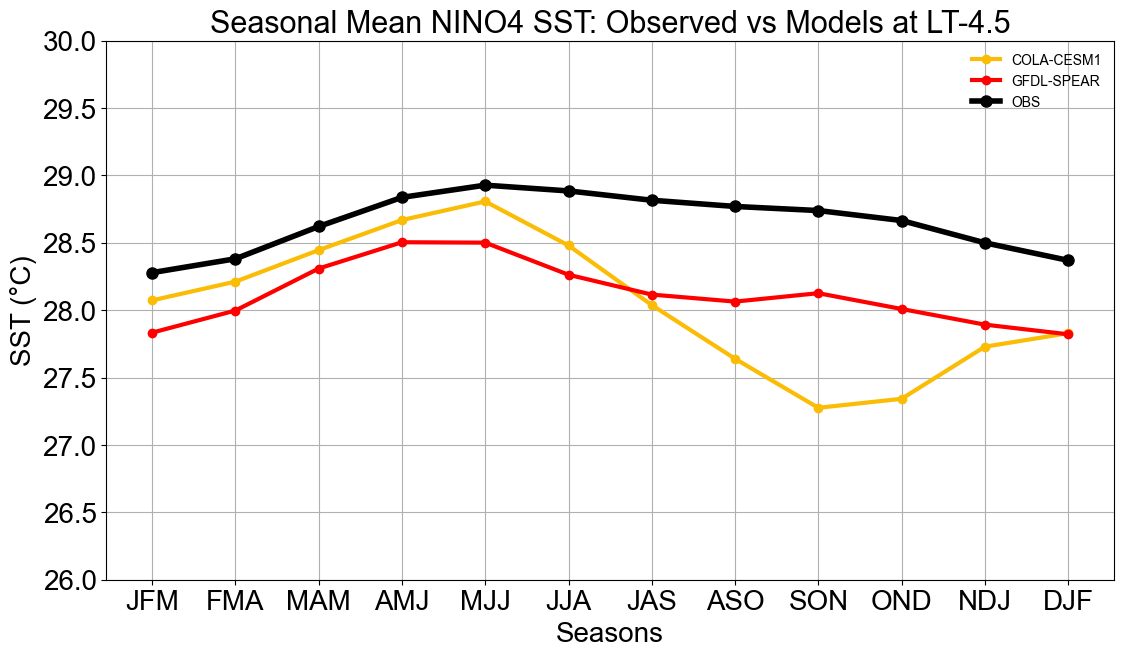

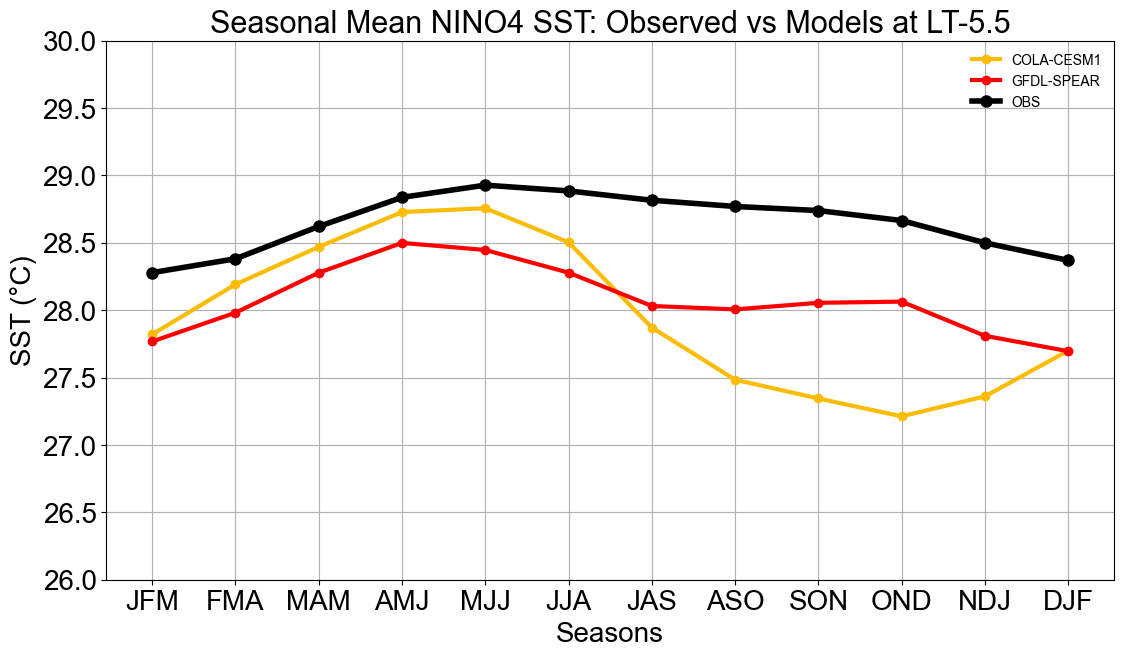

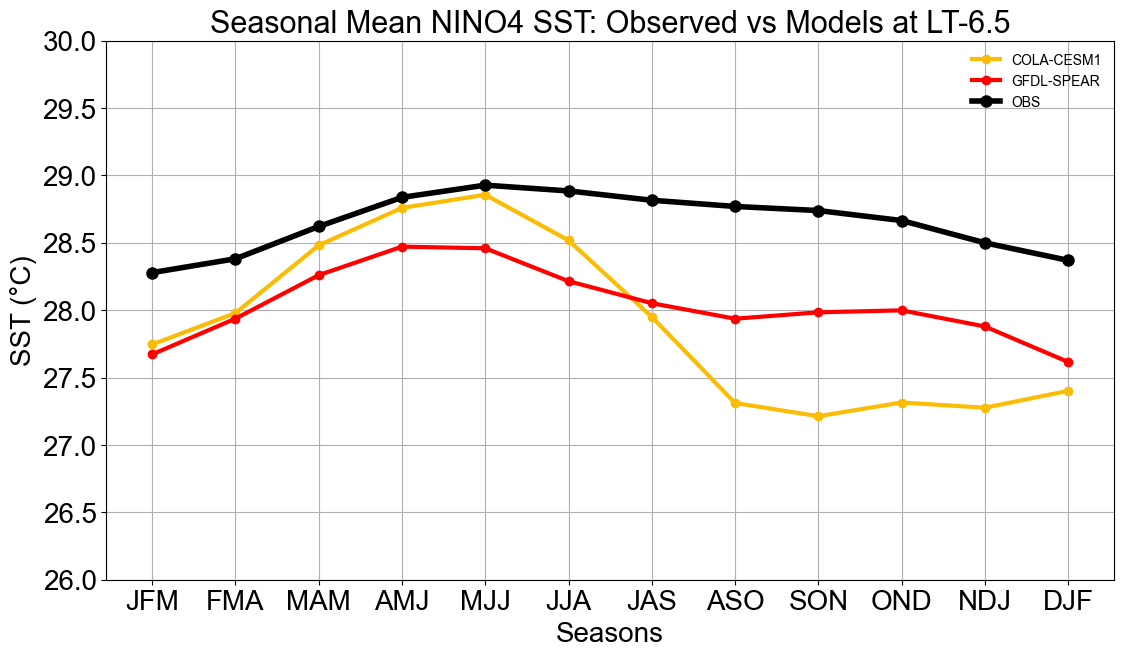

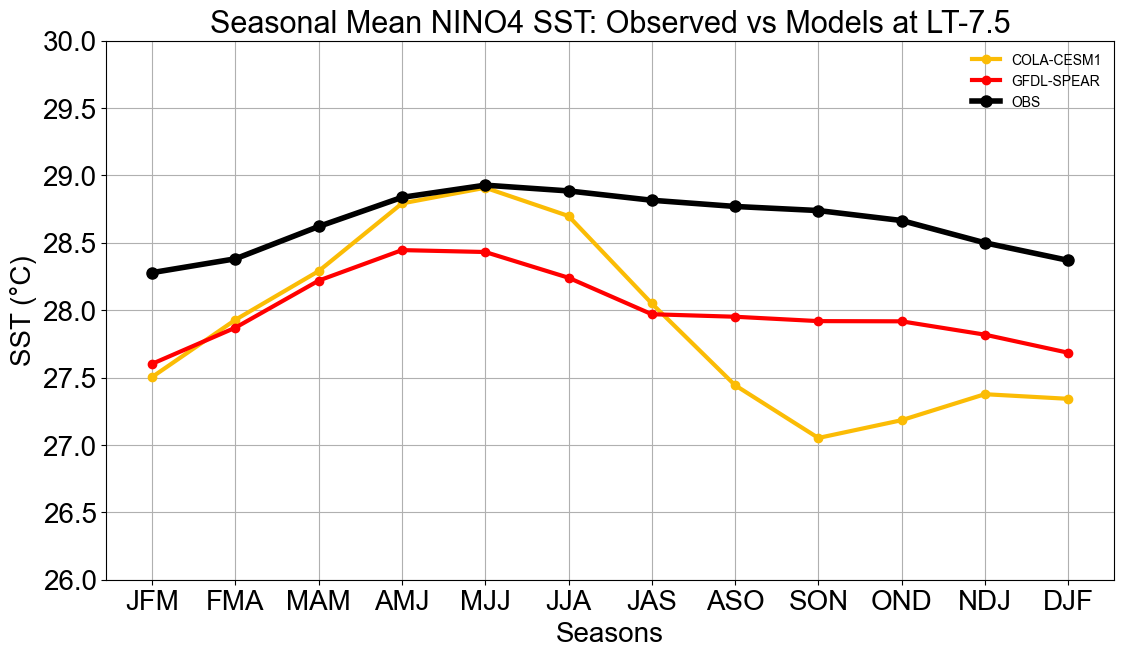

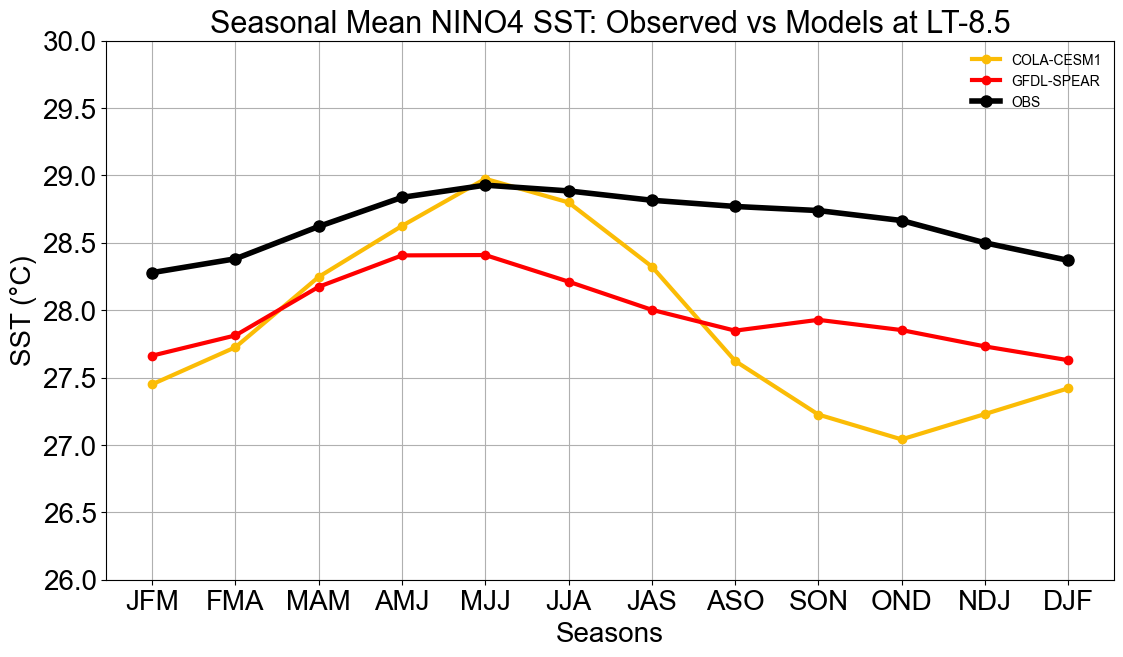

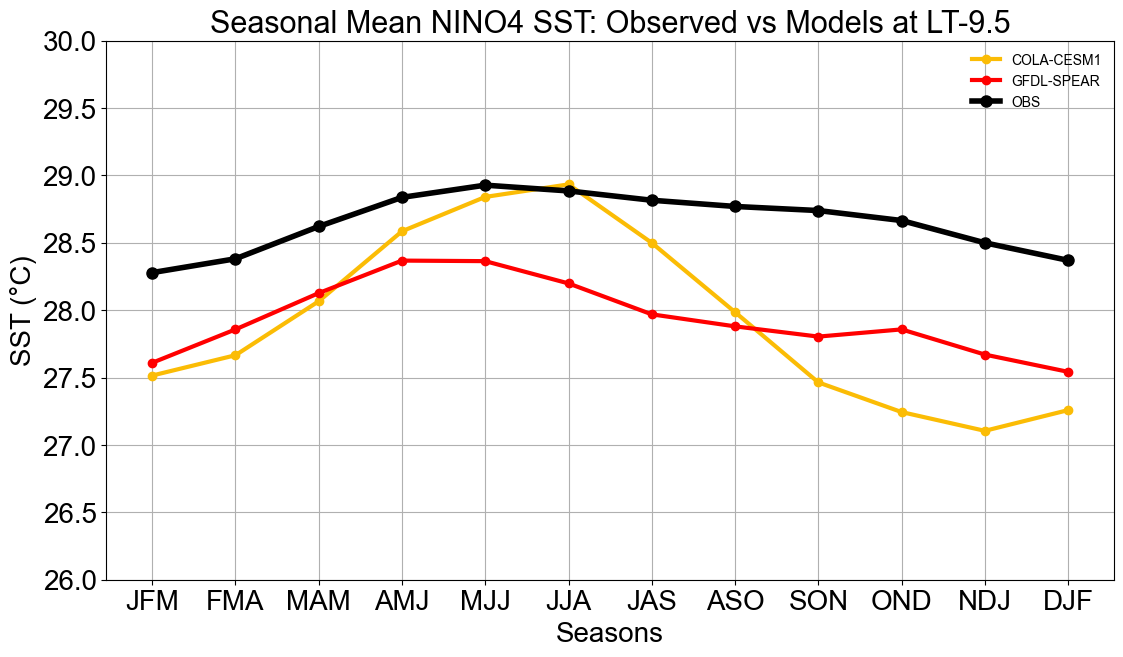

In [14]:
def multimodel_nino3_4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
def multimodel_nino1_2_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=19, ymax=27)
    plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino3_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=22, ymax=28)
    plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=26, ymax=30)
    plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()


visualizer_functions = {
    '1+2': multimodel_nino1_2_visualizer,
    '3': multimodel_nino3_visualizer,
    '3.4': multimodel_nino3_4_visualizer,
    '4': multimodel_nino4_visualizer
}

# Higher-level function to call the appropriate visualizer function
def run_visualizer(region, lead):
    if region in visualizer_functions:
        visualizer_function = visualizer_functions[region]
        visualizer_function(region, lead)
    else:
        print(f"Error: Region {region} is not recognized. Valid regions are {list(visualizer_functions.keys())}.")

regions = ['1+2', '3', '3.4', '4']
leads =  [1,2,3,4,5,6,7,8,9,10]

for region in regions:
    for lead in leads:
       run_visualizer(region, lead)
    